In [36]:
import pandas as pd

import sys
sys.path.append('../')
from utils import *
from resp import responsibility

pd.set_option('display.max_columns', None)

In [3]:
DATA_PATH = '../../data/'
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'

## Load Data

In [4]:
match_info = pd.read_csv(MATCH_IDS_PATH)
match_info = match_info.dropna(subset=['wyscout', 'skillcorner'])
match_info['skillcorner'] = match_info['skillcorner'].astype(int)

In [5]:
match_info.head(5)

,wyscout,skillcorner,date,home,result,away
8,5414111,952209,2023-03-24,France,4-0,Netherlands
10,5414113,726849,2023-03-24,Czech Republic,3-1,Poland
12,5414115,722109,2023-03-24,Sweden,0-3,Belgium
25,5414127,726848,2023-03-26,England,2-0,Ukraine
33,5414135,952208,2023-03-27,Republic of Ireland,0-1,France


In [6]:
wyscout_id = match_info['wyscout'].values[0]
skillcorner_id = match_info['skillcorner'].values[0]

### wyscout

In [7]:
wyscout_data = wyscout_to_df(WYSCOUT_PATH + str(wyscout_id) + ".json")
with pd.option_context('display.max_columns', None):
    display(wyscout_data.head(3))

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,aerialDuel,infraction,carry,type.primary,type.secondary,location.x,location.y,team.id,team.name,team.formation,opponentTeam.id,opponentTeam.name,opponentTeam.formation,player.id,player.name,player.position,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,possession.id,possession.duration,possession.types,possession.eventsNumber,possession.eventIndex,possession.startLocation.x,possession.startLocation.y,possession.endLocation.x,possession.endLocation.y,possession.team.id,possession.team.name,possession.team.formation,possession.attack,pass,carry.progression,carry.endLocation.x,carry.endLocation.y,groundDuel.opponent.id,groundDuel.opponent.name,groundDuel.opponent.position,groundDuel.duelType,groundDuel.keptPossession,groundDuel.progressedWithBall,groundDuel.stoppedProgress,groundDuel.recoveredPossession,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession.attack.withShot,possession.attack.withShotOnGoal,possession.attack.withGoal,possession.attack.flank,possession.attack.xg,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper.id,shot.goalkeeper.name,possession,aerialDuel.opponent.id,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,shot.goalkeeper,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,infraction.opponent
0,1587492614,5414111,1H,0,1,00:00:01.912,3.912638,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",51,50,664,Netherlands,4-2-3-1,4418,France,4-3-3,118,M. Depay,CF,True,114.0,None,24.0,625.0,M. de Roon,RDMF,42.0,83.0,1.587493e+09,110.275779,[],43.0,0.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587492615,5414111,1H,0,5,00:00:05.782,7.782226,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",42,83,664,Netherlands,4-2-3-1,4418,France,4-3-3,625,M. de Roon,RDMF,True,-133.0,None,21.0,476361.0,L. Geertruida,RCB,29.0,60.0,1.587493e+09,110.275779,[],43.0,1.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1587492616,5414111,1H,0,8,00:00:08.951,10.951834,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",29,60,664,Netherlands,4-2-3-1,4418,France,4-3-3,476361,L. Geertruida,RCB,True,-100.0,None,22.0,370.0,V. van Dijk,LCB,25.0,28.0,1.587493e+09,110.275779,[],43.0,2.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### skillcorner

In [8]:
metadata = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_metadata.csv")
tracking_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_tracking.csv")
lineup_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_lineup.csv")
play_direction_df = pd.read_csv(SKILLCORNER_PATH + str(skillcorner_id) + "_play_direction.csv")

In [9]:
print("Metadata")
display(metadata.head(3))
print("Tracking")
display(tracking_df.head(3))
print("Lineup")
display(lineup_df.head(3))
print("Play Direction")
display(play_direction_df)


Metadata


,match_id,match_date,competition,season,home_team,away_team,home_score,away_score,home_team_jersey_color,away_team_jersey_color,home_team_number_color,away_team_number_color,home_team_coach,away_team_coach,pitch_name,pitch_length,pitch_width,provider,fps
0,952209,03/24/2023 19:45,European Championship Qualifiers,2023/2024,France,Netherland,4,0,#fafafa,#ff824c,#000000,#000000,Didier Deschamps,Frank De Boer,Stade de France,105.0,68.0,SkillCorner,10


Tracking


,match_id,half,frame_id,timestamp,object_id,x,y,z,extrapolated
0,952209,1,20,0,-1,0.12,-0.19,0.12,False
1,952209,1,20,0,7604,-39.44,-0.21,0.00,True
2,952209,1,20,0,16320,-16.05,-7.18,0.00,False


Lineup


,match_id,team_name,player_id,player_first_name,player_last_name,player_shirt_number,player_position,player_birthdate,start_time,end_time,yellow_card,red_card,injured,goal,own_goal
0,952209,Netherland,14397,Tyrell,Malacia,16,Right Wing Back,1999-08-17,01:26:59,NaN,0,0,False,0,0
1,952209,Netherland,12654,Donyell,Malen,7,Right Winger,1999-01-19,01:06:22,NaN,0,0,False,0,0
2,952209,Netherland,2548,Davy,Klaassen,14,Attacking Midfield,1993-02-21,01:06:22,NaN,0,0,False,0,0


Play Direction


,match_id,team_name,half,play_direction
0,952209,France,1,BOTTOM_TO_TOP
1,952209,Netherland,1,TOP_TO_BOTTOM
2,952209,France,2,TOP_TO_BOTTOM
3,952209,Netherland,2,BOTTOM_TO_TOP


# Pass Events

In [10]:
passes_df = wyscout_data[wyscout_data['type.primary'] == 'pass']

# Filter out inaccurate passes
accurate_only = True
if accurate_only:
    passes_df = passes_df[passes_df['pass.accurate'] == True]
    
# Filter out passes with invalid recipient id
passes_df = passes_df[passes_df['pass.recipient.id'] != 0]

print(passes_df.shape)

(894, 93)


In [11]:
passes = passes_df.loc[:,['videoTimestamp', 'matchPeriod', 'player.id', 'pass.recipient.id', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']]
passes['matchPeriod'] = passes['matchPeriod'].apply(lambda x: int(x.split('H')[0]))
passes['videoTimestamp'] = passes['videoTimestamp'].astype(float)
passes['pass.recipient.id'] = passes['pass.recipient.id'].astype(int)
passes['pass.endLocation.x'] = passes['pass.endLocation.x'].astype(int)
passes['pass.endLocation.y'] = passes['pass.endLocation.y'].astype(int)

In [12]:
passes.sample(5)

,videoTimestamp,matchPeriod,player.id,pass.recipient.id,location.x,location.y,pass.endLocation.x,pass.endLocation.y
1777,5662.752559,2,370,404748,24,32,44,86
207,705.319126,1,353833,352988,40,4,35,21
667,1984.547484,1,410062,480145,45,86,42,74
1461,4491.669764,2,393247,3682,22,77,28,77
153,584.046744,1,33,625,8,56,29,58


# Map Wyscout IDs to SkillCorner IDs

In [13]:
wyscout2skillcorner = pd.read_csv(WYSCOUT_TO_SKILLCORNER).drop(columns='id')

In [14]:
passes.rename(columns={'player.id': 'player.id.wyscout', 'pass.recipient.id': 'pass.recipient.id.wyscout'}, inplace=True)

In [15]:
passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy', 'team_name_sk']], left_on='player.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'player.id.skillcorner'}, inplace=True)
passes.rename(columns={'team_name_sk': 'team.name'}, inplace=True)

passes = passes.merge(wyscout2skillcorner[['player_id_sk', 'player_id_wy']], left_on='pass.recipient.id.wyscout', right_on='player_id_wy', how='left')
passes.drop(columns=['player_id_wy'], inplace=True)
passes.rename(columns={'player_id_sk': 'pass.recipient.id.skillcorner'}, inplace=True)

In [16]:
cols = ['videoTimestamp', 'matchPeriod', 'team.name', 'player.id.wyscout', 'player.id.skillcorner', 'pass.recipient.id.wyscout', 'pass.recipient.id.skillcorner', 'location.x', 'location.y', 'pass.endLocation.x', 'pass.endLocation.y']
passes = passes.loc[:,cols]

In [17]:
passes.sample(5)

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y
836,5175.044215,2,Netherland,491458,24466,33,4777,37,62,19,54
407,1982.614953,1,France,231139,5922,410062,11630,57,90,45,86
103,663.637011,1,Netherland,625,7017,134102,7863,45,45,38,28
281,1416.886498,1,France,480145,12218,352988,11516,39,71,33,48
694,4040.223286,2,France,410062,11630,231139,5922,31,97,44,72


# Play Direction

In [18]:
play_direction_dict = play_direction_df.drop(columns='match_id').set_index(['team_name', 'half']).to_dict()['play_direction']
play_direction_dict

{('France', 1): 'BOTTOM_TO_TOP',
 ('Netherland', 1): 'TOP_TO_BOTTOM',
 ('France', 2): 'TOP_TO_BOTTOM',
 ('Netherland', 2): 'BOTTOM_TO_TOP'}

In [19]:
player_team_dict = lineup_df[['player_id', 'team_name']].set_index('player_id').to_dict()['team_name']

In [20]:
def get_play_direction(row):
    team_name = player_team_dict[row['player.id.skillcorner']]
    return play_direction_dict[(team_name, row['matchPeriod'])]

In [21]:
passes['play_direction'] = passes.apply(get_play_direction, axis=1)

# Compute ΔxT

In [22]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [23]:
cell_width = 100 / xt_table.shape[1]
cell_height = 100 / xt_table.shape[0]

def get_xt_index(x, y):
    x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
    y_index = int(min(y // cell_height, xt_table.shape[0] - 1))
    return x_index, y_index

def get_xt_value(x, y):
    x_index, y_index = get_xt_index(x, y)
    return xt_table.iat[y_index, x_index]

start_xt = passes.apply(lambda row: get_xt_value(row['location.x'], row['location.y']), axis=1)
end_xt = passes.apply(lambda row: get_xt_value(row['pass.endLocation.x'], row['pass.endLocation.y']), axis=1)

passes['dxt'] = end_xt - start_xt

In [24]:
passes.sample(5)

,videoTimestamp,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt
494,2488.894496,1,France,344132,11606,353833,6028,36,8,80,5,BOTTOM_TO_TOP,0.033315
434,2208.493260,1,France,480145,12218,393247,16320,30,44,30,59,BOTTOM_TO_TOP,0.000016
456,2336.094643,1,France,393247,16320,480145,12218,26,71,32,66,BOTTOM_TO_TOP,0.000929
292,1466.615851,1,Netherland,626551,31930,370,10738,43,8,25,49,TOP_TO_BOTTOM,-0.002720
633,3623.465378,2,France,353833,6028,231139,5922,26,39,26,29,TOP_TO_BOTTOM,-0.000142


# Player Locations

In [25]:
framerate = metadata.loc[0,'fps']

def videotime_to_frame(videotime):
    return int(videotime * framerate)

In [26]:
passes.insert(1, 'frame', passes['videoTimestamp'].apply(videotime_to_frame))
passes.drop(columns='videoTimestamp', inplace=True)

In [27]:
tracking_df.rename(columns={'frame_id': 'frame'}, inplace=True)
tracking_df.set_index('frame', inplace=True)
passes.set_index('frame', inplace=True)

joined_df = passes.join(tracking_df, how='inner', validate='one_to_many')

In [28]:
columns_to_drop = ['match_id', 'half', 'timestamp']
existing_columns_to_drop = [col for col in columns_to_drop if col in joined_df.columns]
joined_df.drop(columns=existing_columns_to_drop, inplace=True)

columns_to_prefix = ['object_id', 'x', 'y', 'z']
prefix = 'tracking.'
joined_df.rename(columns={col: prefix + col for col in columns_to_prefix}, inplace=True)

In [29]:
joined_df.sample(5)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated
frame,,,,,,,,,,,,,,,,,
7773,1,Netherland,134102,7863,535816,33512,36,4,31,11,TOP_TO_BOTTOM,-0.000672,14407,21.19,8.89,0.0,True
50506,2,Netherland,33,4777,491458,24466,10,48,14,61,BOTTOM_TO_TOP,0.000058,11630,0.50,23.20,0.0,True
18673,1,France,209117,277,344132,11606,46,6,40,15,BOTTOM_TO_TOP,-0.000861,11630,-3.83,-26.12,0.0,False
12244,1,Netherland,134102,7863,116,3837,66,9,54,16,TOP_TO_BOTTOM,-0.008470,11516,-30.06,-6.03,0.0,True
54753,2,Netherland,134102,7863,118,7387,47,7,65,6,BOTTOM_TO_TOP,0.010798,7863,-1.11,29.50,0.0,False


# Normalize Pitch Coordinates

In [30]:
pitch_length = metadata['pitch_length'].values[0]
pitch_width = metadata['pitch_width'].values[0]

In [31]:
start_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['location.x'], row['location.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
end_locations = joined_df.apply(
    lambda row: wyscout_to_pitch(row['pass.endLocation.x'], row['pass.endLocation.y'], pitch_length, pitch_width, row['play_direction']), 
    axis=1)
joined_df[['location.x', 'location.y']] = start_locations.apply(pd.Series)
joined_df[['pass.endLocation.x', 'pass.endLocation.y']] = end_locations.apply(pd.Series)

# Identify Tracking Objects

In [32]:
def is_self(row):
    return row['player.id.skillcorner'] == row['tracking.object_id']

def is_teammate(row):
    if row['tracking.object_id'] == -1:
        return False
    player_team = player_team_dict[row['player.id.skillcorner']]
    tracking_player_team = player_team_dict[row['tracking.object_id']]
    return player_team == tracking_player_team

In [33]:
joined_df['tracking.is_self'] = joined_df.apply(is_self, axis=1)
joined_df['tracking.is_teammate'] = joined_df.apply(is_teammate, axis=1)

In [34]:
joined_df.sample(5)

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,tracking.is_self,tracking.is_teammate
frame,,,,,,,,,,,,,,,,,,,
19693,1,France,352988,11516,344132,11606,-29.647059,14.660000,-25.411765,28.901053,BOTTOM_TO_TOP,-0.000021,14407,2.56,14.35,0.0,True,False,False
45366,2,Netherland,365446,12654,491458,24466,11.647059,-24.530526,1.058824,-12.215556,BOTTOM_TO_TOP,-0.004630,11630,24.82,5.92,0.0,False,False,False
16954,1,France,134496,7604,480145,12218,-49.750000,5.636923,-42.875000,25.987368,BOTTOM_TO_TOP,-0.000198,277,-13.57,27.21,0.0,True,False,True
48981,2,Netherland,38,2106,491458,24466,-4.235294,24.530526,6.352941,15.271111,BOTTOM_TO_TOP,0.006164,7604,42.27,1.87,0.0,True,False,False
18967,1,France,410062,11630,3682,946,-24.352941,-24.530526,-15.882353,-27.444211,BOTTOM_TO_TOP,0.000844,7604,-41.33,-2.29,0.0,True,False,True


# Defender Responsibility

In [37]:
joined_df['responsibility'] = joined_df.apply(responsibility, axis=1)
joined_df['responsibility'] = np.where(joined_df['tracking.is_teammate'], 0, joined_df['responsibility'])

# Coordinate Normalization Evaluation

In [38]:
xt_table = pd.read_csv(XT_PLOT_PATH)

In [39]:
a = joined_df[joined_df['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
print('Wyscout - SkillCorner Location Errors')
print(a.describe())

Wyscout - SkillCorner Location Errors
count    893.000000
mean       3.737207
std        2.249448
min        0.130206
25%        2.151520
50%        3.402867
75%        4.891735
max       21.157129
dtype: float64


In [40]:
first_period = joined_df[joined_df['matchPeriod'] == 1]
second_period = joined_df[joined_df['matchPeriod'] == 2]
a = first_period[first_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = second_period[second_period['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nFirst half')
print(a.describe())
print('\nSecond half')
print(b.describe())

Wyscout - SkillCorner Location Errors

First half
count    517.000000
mean       3.514652
std        2.085332
min        0.130206
25%        2.085100
50%        3.284709
75%        4.585417
max       21.157129
dtype: float64

Second half
count    376.000000
mean       4.043221
std        2.426979
min        0.227633
25%        2.196651
50%        3.678401
75%        5.313445
max       16.513037
dtype: float64


In [41]:
extrapolated = joined_df[joined_df['extrapolated']]
not_extrapolated = joined_df[~joined_df['extrapolated']]
a = extrapolated[extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = not_extrapolated[not_extrapolated['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nExtrapolated')
print(a.describe())
print('\nNot Extrapolated')
print(b.describe())

Wyscout - SkillCorner Location Errors

Extrapolated
count    99.000000
mean      4.216838
std       2.586048
min       0.386822
25%       2.137555
50%       3.893010
75%       5.429100
max      13.305496
dtype: float64

Not Extrapolated
count    794.000000
mean       3.677404
std        2.198397
min        0.130206
25%        2.152629
50%        3.378977
75%        4.747816
max       21.157129
dtype: float64


In [42]:
top_bot = joined_df[joined_df['play_direction'] == 'TOP_TO_BOTTOM']
bot_top = joined_df[joined_df['play_direction'] == 'BOTTOM_TO_TOP']
a = top_bot[top_bot['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']],), axis=1)
b = bot_top[bot_top['tracking.is_self']].apply(lambda row: np.linalg.norm([row['location.x'] - row['tracking.x'], row['location.y'] - row['tracking.y']]), axis=1)

print('Wyscout - SkillCorner Location Errors')
print('\nTop to Bottom')
print(a.describe())
print('\nBottom to Top')
print(b.describe())

Wyscout - SkillCorner Location Errors

Top to Bottom
count    402.000000
mean       3.739519
std        2.342433
min        0.130206
25%        2.125241
50%        3.358943
75%        4.985521
max       21.157129
dtype: float64

Bottom to Top
count    491.000000
mean       3.735314
std        2.172766
min        0.175085
25%        2.154688
50%        3.461547
75%        4.862048
max       16.513037
dtype: float64


# Study high-dxt pass

In [43]:
selected_pass = joined_df.sort_values(by = 'dxt', ascending = False).iloc[:23]
selected_pass = selected_pass[selected_pass['responsibility'] > 0]

In [44]:
selected_pass

,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,tracking.is_self,tracking.is_teammate,responsibility
frame,,,,,,,,,,,,,,,,,,,,
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11606,-44.89,1.37,0.0,False,False,False,0.763351
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,11516,-45.92,-4.00,0.0,False,False,False,0.893808
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,16320,-45.03,-13.34,0.0,False,False,False,0.461204
10664,1,Netherland,535816,33512,116,3837,-45.625,-16.493333,-47.0,1.409231,TOP_TO_BOTTOM,0.126503,7604,-50.61,-3.05,0.0,False,False,False,0.428261


# Interceptability Triangle

In [45]:
import matplotlib.pyplot as plt

In [46]:
def plot_interceptability_triangle(row, ball_speed=12.0, defender_speed=6.0):
    # Extract pass and defender coordinates
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    defender_x = row['tracking.x']
    defender_y = row['tracking.y']

    # Pass vector and length
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)

    if pass_length == 0:
        print("Pass length is zero; cannot plot region.")
        return

    # Ball travel time
    ball_time = pass_length / ball_speed

    # Maximum defender travel distance
    max_defender_distance = defender_speed * ball_time

    # Unit vector of the pass
    pass_unit_vector = pass_vector / pass_length

    # Perpendicular vector to the pass trajectory
    perp_vector = np.array([-pass_unit_vector[1], pass_unit_vector[0]])

    # Generate points along the pass trajectory
    num_segments = 50  # Higher number for smoother visualization
    segment_lengths = np.linspace(0, pass_length, num_segments)
    left_vertices = []
    right_vertices = []

    for seg_len in segment_lengths:
        # Calculate the current point along the pass trajectory
        current_point = np.array([start_x, start_y]) + seg_len * pass_unit_vector

        # Width at this point grows linearly with the defender's possible travel distance
        current_width = 2 * defender_speed * (seg_len / ball_speed)

        # Calculate perpendicular points for left and right edges
        left_vertex = current_point - (current_width / 2) * perp_vector
        right_vertex = current_point + (current_width / 2) * perp_vector

        left_vertices.append(left_vertex)
        right_vertices.append(right_vertex)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([start_x, end_x], [start_y, end_y], 'b-', label='Pass Trajectory', linewidth=2)

    # Plot left and right edges
    left_x, left_y = zip(*left_vertices)
    right_x, right_y = zip(*right_vertices)
    plt.plot(left_x, left_y, 'r--', linewidth=1, label='Left Edge')
    plt.plot(right_x, right_y, 'r--', linewidth=1, label='Right Edge')

    # Draw perpendicular lines
    for left, right in zip(left_vertices, right_vertices):
        plt.plot([left[0], right[0]], [left[1], right[1]], 'r--', linewidth=1)

    # Add defender and pass start/end
    plt.scatter(defender_x, defender_y, color='g', label='Defender', zorder=5)
    plt.scatter([start_x, end_x], [start_y, end_y], color='blue', label='Pass Start/End', zorder=5)

    # Add labels and grid
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.title('Symmetrical Perpendicular Interceptability Region')
    plt.grid()
    plt.show()

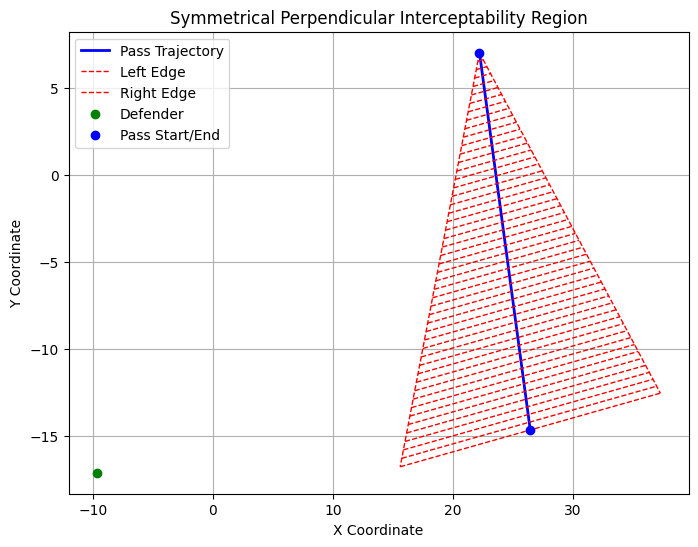

In [47]:
plot_interceptability_triangle(joined_df.iloc[50])

In [48]:
passes_df

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,aerialDuel,infraction,carry,type.primary,type.secondary,location.x,location.y,team.id,team.name,team.formation,opponentTeam.id,opponentTeam.name,opponentTeam.formation,player.id,player.name,player.position,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,possession.id,possession.duration,possession.types,possession.eventsNumber,possession.eventIndex,possession.startLocation.x,possession.startLocation.y,possession.endLocation.x,possession.endLocation.y,possession.team.id,possession.team.name,possession.team.formation,possession.attack,pass,carry.progression,carry.endLocation.x,carry.endLocation.y,groundDuel.opponent.id,groundDuel.opponent.name,groundDuel.opponent.position,groundDuel.duelType,groundDuel.keptPossession,groundDuel.progressedWithBall,groundDuel.stoppedProgress,groundDuel.recoveredPossession,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession.attack.withShot,possession.attack.withShotOnGoal,possession.attack.withGoal,possession.attack.flank,possession.attack.xg,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper.id,shot.goalkeeper.name,possession,aerialDuel.opponent.id,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,shot.goalkeeper,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,infraction.opponent
0,1587492614,5414111,1H,0,1,00:00:01.912,3.912638,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",51,50,664,Netherlands,4-2-3-1,4418,France,4-3-3,118,M. Depay,CF,True,114.0,None,24.0,625.0,M. de Roon,RDMF,42.0,83.0,1.587493e+09,110.275779,[],43.0,0.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1587492615,5414111,1H,0,5,00:00:05.782,7.782226,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",42,83,664,Netherlands,4-2-3-1,4418,France,4-3-3,625,M. de Roon,RDMF,True,-133.0,None,21.0,476361.0,L. Geertruida,RCB,29.0,60.0,1.587493e+09,110.275779,[],43.0,1.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1587492616,5414111,1H,0,8,00:00:08.951,10.951834,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",29,60,664,Netherlands,4-2-3-1,4418,France,4-3-3,476361,L. Geertruida,RCB,True,-100.0,None,22.0,370.0,V. van Dijk,LCB,25.0,28.0,1.587493e+09,110.275779,[],43.0,2.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1587492617,5414111,1H,0,13,00:00:13.151,15.151013,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",25,28,664,Netherlands,4-2-3-1,4418,France,4-3-3,370,V. van Dijk,LCB,True,90.0,None,16.0,476361.0,L. Geertruida,RCB,25.0,51.0,1.587493e+09,110.275779,[],43.0,3.0,51.0,50.0,35.0,67.0,664.0,Netherlands,4-2-3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1587492619,5414111,1H,0,17,00:00:17.930,19.930736,1.587493e+09,NaN,NaN,NaN,NaN,NaN,pass,"[lateral_pass, short_or_medium_pass]",32,50,664,Netherlands,4-2-3-1,4418,France,4-3-3,476361,L. Geertruida,RCB,True,-95.0,None,23.0,370.0,V. v